In [1]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')
#https://github.com/kirbs-/hide_code

# Machine Learning

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
import altair as alt

def plot_imp(target, best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=target + " " + method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.95, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [4]:
ds = pd.read_csv('S1SubAct_B_m_NoDupes.csv', index_col = "duration")
ds.reset_index(drop = True, inplace = True)

In [5]:
ds.head()

,bathroom_toiletflush,bathroom_lightswitch,foyer_lightswitch,kitchen_lightswitch,kitchen_burner,livingroom_lightswitch,bedroom_lightswitch,kitchen_coffeemachine,kitchen_drawer,kitchen_refrigerator,...,bathroom_sinkfaucet-hot,kitchen_dishwasher,livingroom_lamp,study_drawer,bathroom_sinkfaucet-cold,kitchen_laundrydryer,study_lightwitch,bathroom_showerfaucet,bathroom_exhaustfan,kitchen_garbagedisposal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ds_sensors = pd.read_csv('S1Sensors_preprocessed.csv', index_col = 'subActNum')
#allSubActs = list(set(ds_sensors.concat)) #potentially useful but currently unused
poweredSubActs = list(set(ds_sensors[ds_sensors.reqEnergy].concat))
ds_sensors.head()

,room,activity,concat,reqEnergy,subActNumConcat
subActNum,,,,,
100,Bathroom,Toilet Flush,bathroom_toiletflush,False,subActNum_100
101,Bathroom,Light switch,bathroom_lightswitch,True,subActNum_101
104,Foyer,Light switch,foyer_lightswitch,True,subActNum_104
105,Kitchen,Light switch,kitchen_lightswitch,True,subActNum_105
106,Kitchen,Burner,kitchen_burner,True,subActNum_106


## This is a loop for all powered subActs

kitchen_oven
0.9949558638083228
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1b42e450>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

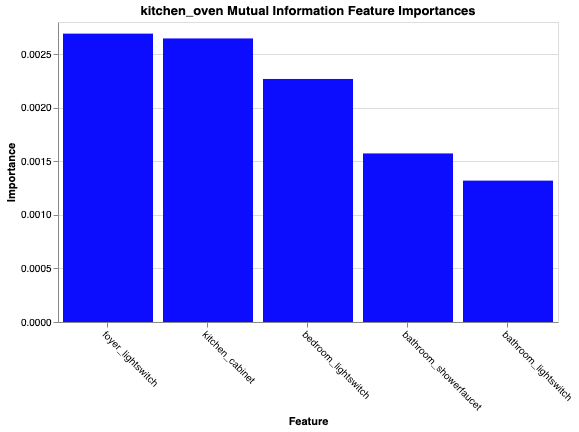

kitchen_lightswitch
0.7452711223203027
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1b42e7d0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

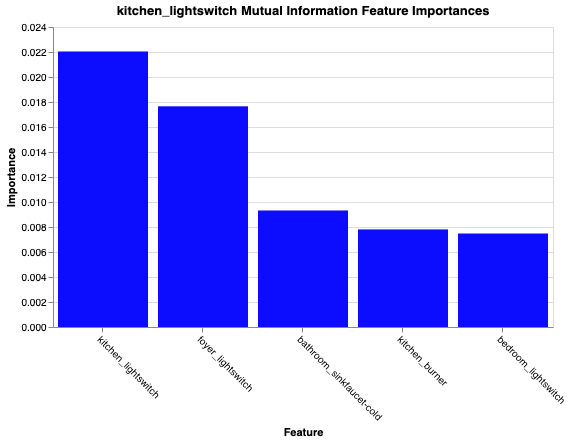

kitchen_coffeemachine
0.998108448928121
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1b481390>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

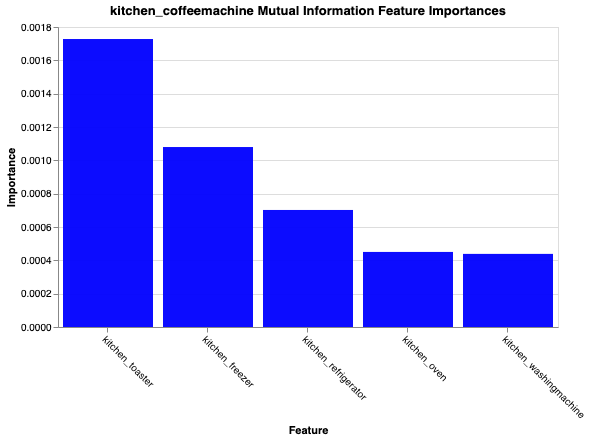

foyer_lightswitch
0.9918032786885246
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcb0ad0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

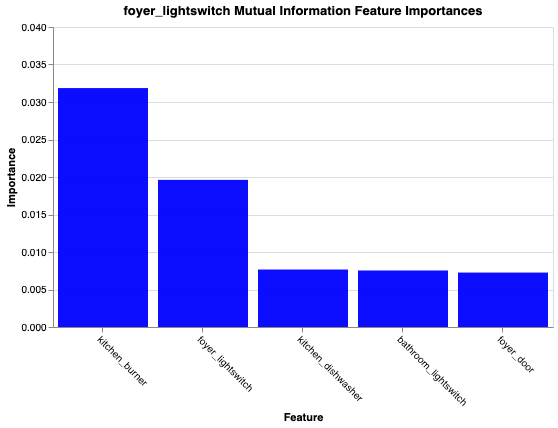

livingroom_dvd
0.9993694829760403
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1b42edd0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

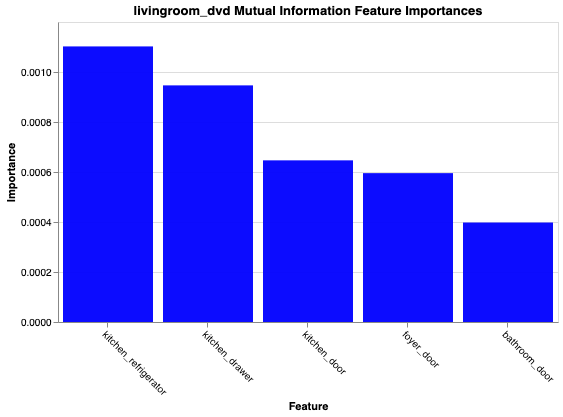

kitchen_washingmachine
0.9829760403530895
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcb4a10>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

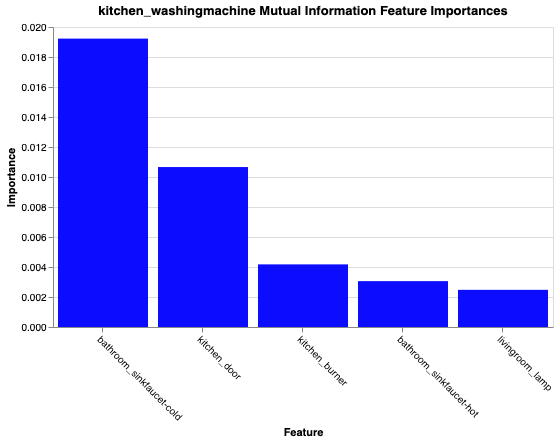

bathroom_lightswitch
0.8253467843631778
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcdcc90>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

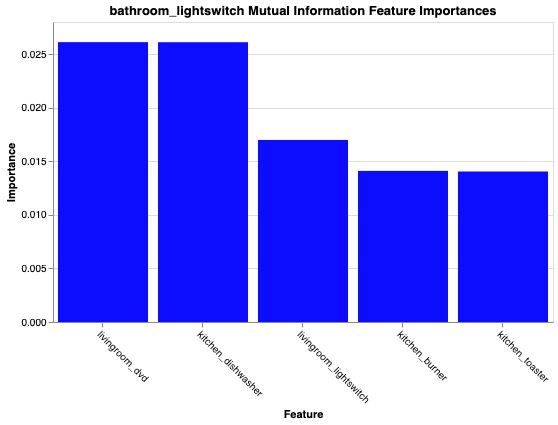

bedroom_lightswitch
0.9791929382093316
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcb4ad0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

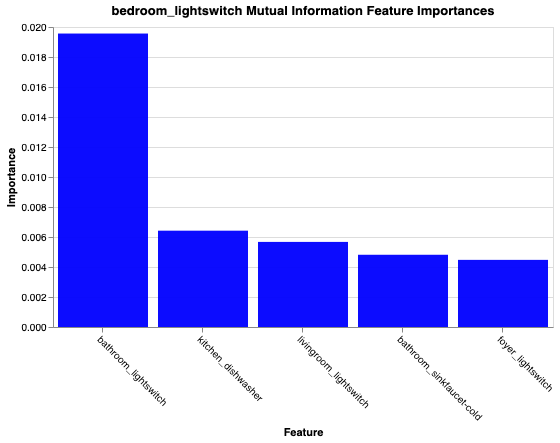

livingroom_lightswitch
0.8965952080706179
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcb4450>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

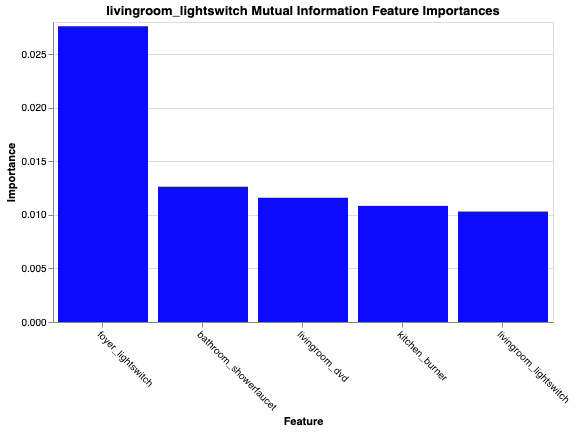

bathroom_sinkfaucet-hot
0.9754098360655737
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bca0810>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

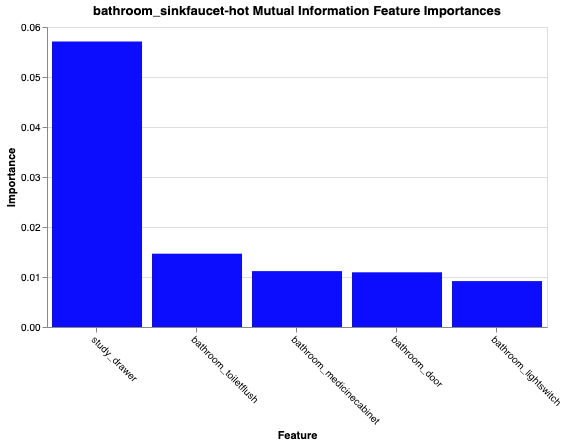

study_lightwitch
0.8865069356872636
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcdc690>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

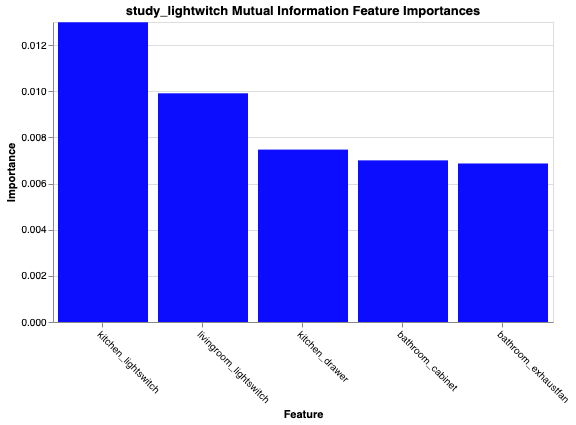

bathroom_exhaustfan
0.8738965952080706
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcdc510>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

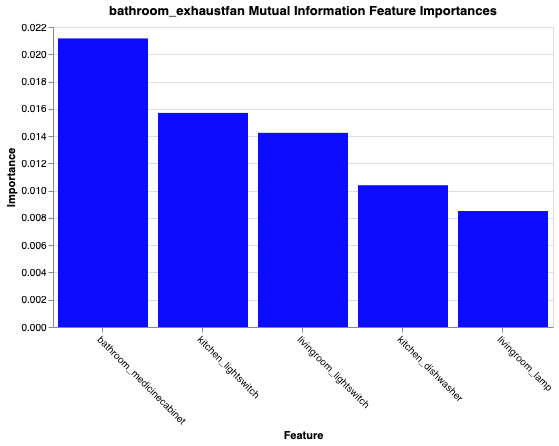

kitchen_refrigerator
0.9590163934426229
Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.0s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a1bcb0ad0>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini',

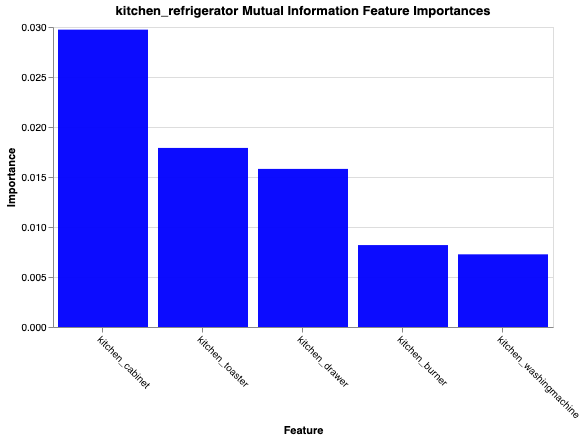

porch_lightswitch


KeyError: "['porch_lightswitch'] not found in axis"

In [7]:
table = []

for subAct in poweredSubActs:
    print(subAct)
    row = {"Target":subAct}
    
    Data = ds.drop(columns = subAct).values
    target = ds[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)
    
    dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)
    
    dt_classifier.fit(D_train, t_train)
    print(dt_classifier.score(D_test, t_test))
    
    cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 3, 
                                    random_state = 999)

    dt_classifier = DecisionTreeClassifier(random_state=999)

    params_DT = {'criterion': ['gini', 'entropy'],
                 'max_depth': [2, 3, 4, 5]}

    gs = GridSearchCV(estimator=dt_classifier, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy')
    
    print(gs.fit(Data, target))
    print(gs.best_params_)
    print(gs.best_score_)
    
    num_features = 5
    fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
    fs_fit_mutual_info.fit_transform(Data, target)
    fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
    best_features_mutual_info = ds.columns[fs_indices_mutual_info].values
    print(best_features_mutual_info)
    
    feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
    print(feature_importances_mutual_info)
    
    best_feats = dict(zip(best_features_mutual_info, feature_importances_mutual_info))
    row.update(best_feats)
    table.append(row)
    
    plot = plot_imp(subAct, best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information', 'blue')
    plot.display()
    
ds_best_feats = pd.DataFrame(table)
ds_best_feats.head()

### Feature Selection Using Mutual Information

The mutual information method is a filter feature selection method that looks at the relationship between each descriptive feature and the target feature using the concept of entropy.

The code below returns the indices of the 5 features that have the highest mutual information value. As in the F-score method, the wrapper is not used in any way when selecting features using the mutual information method.

In [16]:
# import datetime as dt
# def add_DAY_WDWE_phaseII(ds):
#     dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
#     dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
#     ds.set_index(ds['timestamp'], inplace = True)
#     ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
#     ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
#     ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
#     ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
#     ds.reset_index(drop = True, inplace = True)
#     ds['Hour'] = ds['timestamp'].dt.hour
#     return ds

# df = add_DAY_WDWE_phaseII(df)
# df.head()

In [17]:
# df['Phase'] = "Afternoon"
# df.loc[df['Hour'] < 9, 'Phase'] = "Morning"
# df.loc[df['Hour'] >= 17, 'Phase'] = "Evening"
# df.head()

## Can we please also have summary stats - for example, 'Washine Machine on WD morning has a mean value of X with a SD of Y'

In [35]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import datetime as dt

df = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = "duration")
df.reset_index(drop = True, inplace = True)

df_sensors = pd.read_csv('S1Sensors_preprocessed.csv', index_col = None)
df_sensors = df_sensors[df_sensors.reqEnergy]

df_costs = pd.read_csv('power_costs.csv', index_col = None)

def add_DAY_WDWE_phaseII(ds):
    dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
    dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
    ds.set_index(ds['timestamp'], inplace = True)
    ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
    ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
    ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
    ds.reset_index(drop = True, inplace = True)
    ds['Hour'] = ds['timestamp'].dt.hour
    return ds

In [37]:
ds = pd.read_csv('S1SubActivities_temporalFeaturesNoDUPES.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 07:12:41,3,Thu,WD,6,1715
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [39]:
ds_new = ds.copy()
ds_new['Phase'] = "Afternoon"
ds_new.loc[ds_new['HOUR'] < 9, 'Phase'] = "Morning"
ds_new.loc[ds_new['HOUR'] >= 17, 'Phase'] = "Evening"
benchmark_usage = ds_new.groupby(['subAct','WDWE','Phase'])['durationSec'].describe()
benchmark_usage

count          mean           std  \
subAct                   WDWE Phase                                          
bathroom_cabinet         WD   Afternoon   29.0    691.103448   3684.014438   
                              Evening     24.0     72.166667    339.703665   
                              Morning     25.0      4.800000      3.559026   
                         WE   Afternoon   11.0      4.181818      3.763461   
                              Evening     11.0      2.272727      1.489356   
                              Morning      4.0   6448.500000  12884.334480   
bathroom_door            WD   Afternoon   20.0    632.200000   2261.413498   
                              Evening     18.0    104.500000    201.793211   
                              Morning     13.0     45.923077     67.082613   
                         WE   Afternoon    8.0   2154.125000   6049.168454   
                              Evening     10.0    115.400000    215.446410   
                              Morning      4.0     29.000000     38.453435   
bathroom_exhaustfan      WD   Afternoon    7.0   1293.857143   1206.828962   
                              Evening      7.0    553.428571    898.082561   
                              Morning      8.0   1221.500000    929.652009   
                         WE   Afternoon    6.0   1299.000000   2502.200871   
                              Evening      3.0    383.333333    282.369144   
                              Morning      3.0   3413.333333   3234.205054   
bathroom_lightswitch     WD   Afternoon   10.0   1726.400000   3362.940948   
                              Evening     20.0   1019.650000   1963.498175   
                              Morning      8.0   1430.625000   1383.578996   
                         WE   Afternoon    6.0    585.333333    762.054766   
                              Evening      5.0   1734.200000   2795.616873   
bathroom_medicinecabinet WD   Afternoon   56.0   3814.000000   7087.517760   
                              Evening     43.0    212.093023    389.986191   
                              Morning     46.0   5092.500000  10471.167431   
                         WE   Afternoon   22.0   4758.545455   7142.136440   
                              Evening     21.0    594.523810   1632.760534   
                              Morning      6.0   7389.166667  12159.893674   
bathroom_showerfaucet    WD   Afternoon   14.0   6987.928571  12203.480377   
...                                        ...           ...           ...   
kitchen_toaster          WD   Evening     10.0     10.800000     10.271860   
                              Morning     11.0      2.272727      1.348400   
                         WE   Afternoon   20.0      8.450000     21.236699   
                              Evening      2.0      1.000000      0.000000   
                              Morning      2.0      6.000000      5.656854   
kitchen_washingmachine   WD   Afternoon   13.0     44.230769     32.189941   
                              Evening      8.0     40.875000     57.820998   
                              Morning      2.0     22.500000     14.849242   
                         WE   Afternoon   22.0     10.272727     16.779187   
                              Morning      3.0     53.000000     87.481427   
livingroom_dvd           WD   Evening      1.0      5.000000           NaN   
                         WE   Afternoon    1.0     36.000000           NaN   
livingroom_lamp          WD   Afternoon    2.0   8587.000000      0.000000   
                              Evening      2.0  10954.000000   6242.338664   
                         WE   Afternoon    1.0  19162.000000           NaN   
                              Evening      2.0   7843.500000   6620.640792   
livingroom_lightswitch   WD   Afternoon    1.0  24595.000000           NaN   
                              Evening      5.0   5972.600000   4051.829007   
                              Morning      1.0  45869.000000   

In [19]:
#Assuming everything that is common has been pre-processed by this stage

def calc_subAct(dataframe, subAct, wattage, df_costs):
    # Duplicate the DF to avoid corrupting it
    df = dataframe.copy()
    
    # First step is to train the classifier
    Data = df.drop(columns = subAct).values
    target = df[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                        target, 
                                                        test_size = 0.3,
                                                        random_state=999)
    dt_classifier = DecisionTreeClassifier(max_depth=4,
                                           criterion='entropy',
                                           random_state = 999)
    dt_classifier.fit(D_train, t_train)
    confidence = dt_classifier.score(D_test, t_test)
    df['prediction'] = dt_classifier.predict(Data)
    df['intervention'] = (df['prediction'].diff() == -1) & (df[subAct] == 1)
    
    dfIDX = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = None)
    dfIDX.duration = pd.to_datetime(dfIDX.duration, format='%Y-%m-%d %H:%M:%S')
    df['timestamp'] = dfIDX['duration']

    df = add_DAY_WDWE_phaseII(df)
    df['Phase'] = "Afternoon"
    df.loc[df['Hour'] < 12, 'Phase'] = "Morning"
    df.loc[df['Hour'] >= 18, 'Phase'] = "Evening"
    
    # Calculate approx durations
    duration = 0
    duration_col = []

    for row in df.iterrows():
        if row[1][subAct] == 1:
            duration += 1
        else:
            duration = 0

        duration_col.append(duration)

    df['duration'] = duration_col

    cancelled_interventions = 0
    completed_interventions = 0
    possible_intervention = False
    intervening = False

    total_minutes_saved = 0
    total_kwh_saved = 0
    total_dollars_saved = 0

    for row in df.iterrows():
        if row[1]['intervention'] and not intervening:
            possible_intervention = True
        if possible_intervention:
            if row[1][subAct] == 0:
                possible_intervention = False
                cancelled_interventions += 1
            else:
                if row[1]['duration'] > benchmark_usage[subAct][row[1]['WDWE']][row[1]['Phase']] / 60:
                    intervening = True
                    completed_interventions += 1
                    possible_intervention = False
        if intervening:
            if row[1][subAct] == 0:
                intervening = False
            else:
                total_minutes_saved += 1
                kwh_saved = wattage / 60
                total_kwh_saved += kwh_saved
                hour = row[1]['Hour']
                wdwe = row[1]['WDWE']
                rate = df_costs[(df_costs['Hour'] == hour) & (df_costs['WDWE'] == wdwe)].iloc[0]['cost_per_kwh']
                dollars_saved = rate * kwh_saved
                total_dollars_saved += dollars_saved

    # We see that we didn't quite save as many minutes of electricity but we likely annoyed the user less
    # Note that this means our 'confidence' value is going to be more conservative than it needs to be
    print("SubAct:",subAct)
    print("Classifier confidence:", confidence)
    print("Number of completed interventions:", completed_interventions)
    print("Number of interventions cancelled due to not meeting average number of minutes usage:", 
          cancelled_interventions)
    print("Total minutes saved:", total_minutes_saved)
    print("Total minutes saved, accounting for confidence:", total_minutes_saved * confidence)
    print("Total electricity saved (kwh):", total_kwh_saved)
    print("Total electricity saved, accounting for confidence (kwh):", total_kwh_saved * confidence)
    print("Total money saved: $", total_dollars_saved)
    print("Total money saved accounting for confidence:  $", total_dollars_saved * confidence)
    print()
    

for row in df_sensors.iterrows():
    subAct = row[1]['concat']
    wattage = row[1]['wattage']
    calc_subAct(df, subAct, wattage, df_costs)

NameError: name 'benchmark_usage' is not defined

# Discussion

<img src="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png" alt="Satellite-images-of-India-by-night-–-Sala-I-Martin-paper" class="wp-image-7749" srcset="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png 750w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-150x96.png 150w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-400x256.png 400w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-768x491.png 768w" sizes="(max-width: 750px) 100vw, 750px">

In [20]:
# !jt -l
# !jt -t <theme>
# !jt -r